#Starter

In [1]:
# if open from google colab, run this command
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/Github/sales-prediction-gru/ipynb
%cd /content/drive/Shareddrives/BUAT\ DIEGO/Data-retail-2015-2022-keluar/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/BUAT DIEGO/Data-retail-2015-2022-keluar


In [2]:
import os, warnings, random

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import optimizers, Sequential, Model, callbacks
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Bidirectional, GRU, RepeatVector, Dense, TimeDistributed 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline 

import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Set seeds to make the experiment more reproducible.
# def seed_everything(seed=0):
#     random.seed(seed)
#     np.random.seed(seed)
#     tf.random.set_seed(seed)
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     os.environ['TF_DETERMINISTIC_OPS'] = '1'

# seed = 0
# seed_everything(seed)
# warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# df2015 = pd.read_csv('./data-2015-renew.csv')
df2016 = pd.read_csv('./data-2016-renew.csv', parse_dates=['tgl'])
df2017 = pd.read_csv('./data-2017-renew.csv', parse_dates=['tgl'])
df2018 = pd.read_csv('./data-2018-renew.csv', parse_dates=['tgl'])
df2019 = pd.read_csv('./data-2019-renew.csv', parse_dates=['tgl'])
# df2020 = pd.read_csv('./data-2020-renew.csv')
# df2021 = pd.read_csv('./data-2021-renew.csv')
# df2022 = pd.read_csv('./data-2022-renew.csv')

In [4]:
df2016 = df2016.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2017 = df2017.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2018 = df2018.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)
df2019 = df2019.drop(['notxn', 'nonota', 'namabarang', 'hargabeli', 'diskon', 'hargaafterdiskon', 'subtotal', 'kodeop', 'isbkp', 'kodecustomer', 'iddistributor', 'idpromo', 'iddivisi', 'jenis', 'kategori', 'kodedepartemen', 'departemen', 'namaop', 'kodedivisibarang', 'divisibarang'], axis=1)

In [5]:
df = pd.concat([df2016, df2017, df2018])

In [6]:
# remove strange value in each rows
df['barcode'] = df['barcode'].str.split(' ').str[0]

In [7]:
# df['Year-Month'] = df['tgl'].apply(lambda x: x.strftime('%Y-%m')).astype(str)
df['month_yr'] = df['tgl'].apply(lambda x: x.strftime('%m-%y')).astype(str)

In [8]:
df['month_yr'] = df['month_yr'].map({'01-16':0,'02-16':1,'03-16':2,'04-16':3,'05-16':4,'06-16':5,'07-16':6,'08-16':7,'09-16':8,'10-16':9,'11-16':10,'12-16':11,
                                          '01-17':12,'02-17':13,'03-17':14,'04-17':15,'05-17':16,'06-17':17,'07-17':18,'08-17':19,'09-17':20,'10-17':21,'11-17':22,'12-17':23,
                                          '01-18':24,'02-18':25,'03-18':26,'04-18':27,'05-18':28,'06-18':29,'07-18':30,'08-18':31,'09-18':32,'10-18':33,'11-18':34,'12-18':35})

In [9]:
# df["barcode"] = df["barcode"].astype(str).astype(int)
# df["kodejenis"] = df["kodejenis"].astype(str).astype(float)

#Test

In [10]:
df.head()

,tgl,satuan,qty,hargajual,barcode,kodejenis,kodekategori,month_yr
0,2016-10-28 12:09:33.220,PCS,4.00,4200.00,8991038110354,10507,105.00,9
1,2016-01-02 15:51:33.187,PCS,1.00,10050.00,4902430400664,10304,103.00,0
2,2016-07-22 18:48:08.593,PCS,1.00,4000.00,8992772198011,10506,105.00,6
3,2016-06-24 11:46:13.417,PCS,1.00,4750.00,8992933621112,20102,201.00,5
4,2016-11-06 13:57:40.160,PCS,2.00,15300.00,3014260842956,10307,103.00,10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8923868 entries, 0 to 3044193
Data columns (total 8 columns):
 #   Column        Dtype         
---  ------        -----         
 0   tgl           datetime64[ns]
 1   satuan        object        
 2   qty           float64       
 3   hargajual     float64       
 4   barcode       object        
 5   kodejenis     object        
 6   kodekategori  float64       
 7   month_yr      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 612.8+ MB


In [12]:
barcode_u = len(pd.unique(df['barcode']))
jenis_u = len(pd.unique(df['kodejenis']))
print('Unique Barcode:',barcode_u)
print('Unique Kode Jenis:',jenis_u)

Unique Barcode: 30348
Unique Kode Jenis: 171


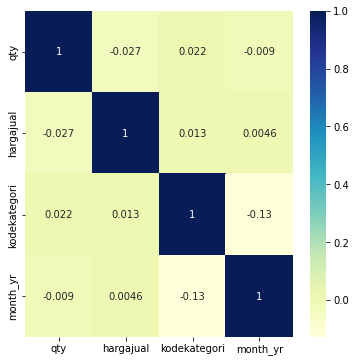

In [13]:
corr = df.corr()
top_corr_features = corr.index[abs(corr["qty"])>0]

plt.figure(figsize=(6,6))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="YlGnBu")

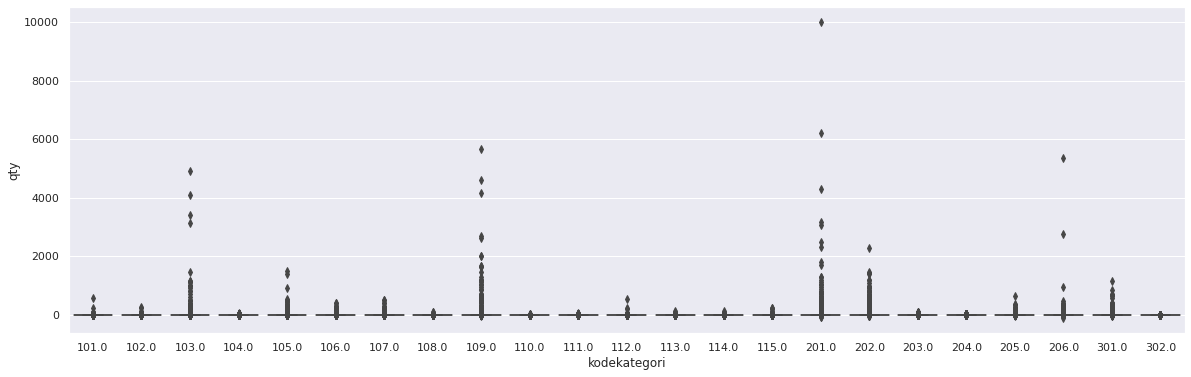

In [14]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='kodekategori', y='qty', data=df)

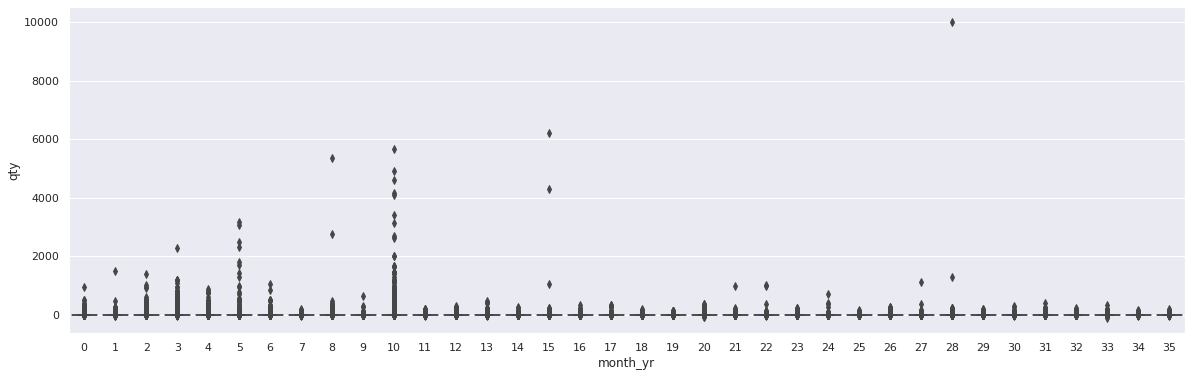

In [15]:
sns.set(rc={'figure.figsize':(20,6)})
sns.boxplot(x='month_yr', y='qty', data=df)

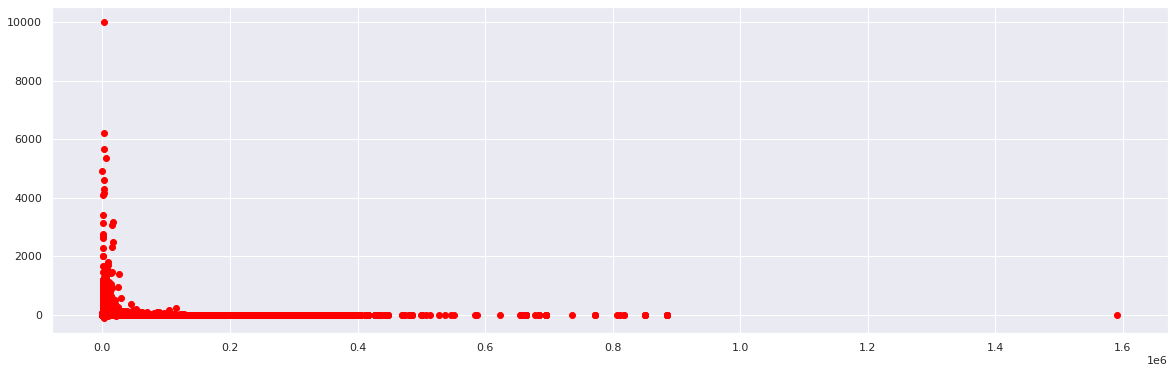

In [16]:
plt.scatter(df['hargajual'], df['qty'], color = "red")
plt.show()

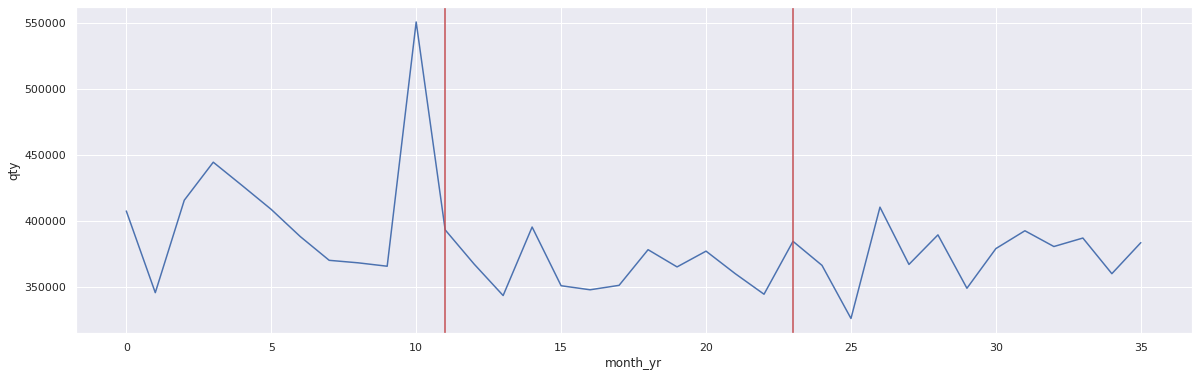

In [17]:
df_plot = df.groupby(['month_yr'],as_index=False).sum()
df_plot.head()
sns.set(rc={'figure.figsize':(20,6)})
sns.lineplot(x='month_yr', y='qty', data=df_plot)
plt.axvline(x=11, ymin=0, ymax=1, color='r')
plt.axvline(x=23, ymin=0, ymax=1, color='r')

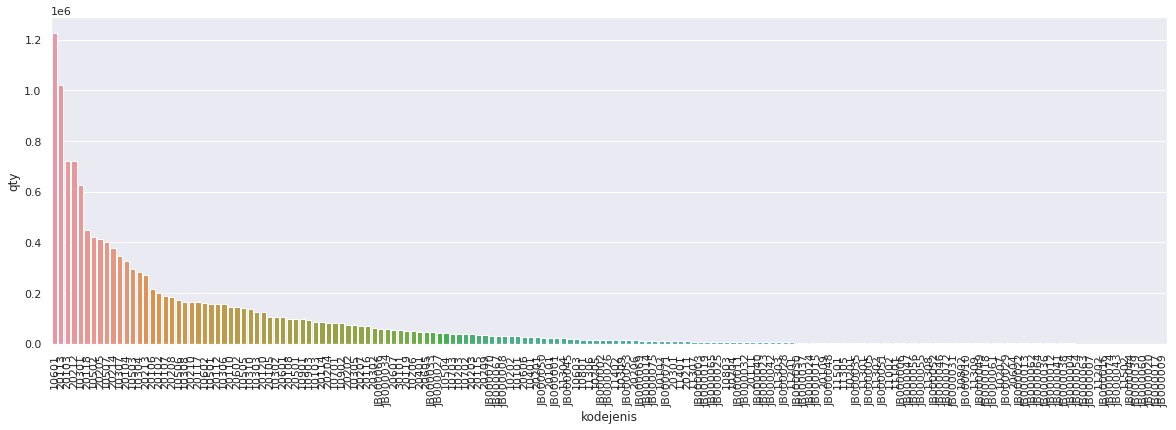

In [18]:
df_s = df.groupby(['kodejenis'],as_index=False).sum().sort_values("qty", ascending=False)
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(x='kodejenis', y='qty', data=df_s, )
plt.xticks(rotation=90)
plt.show()

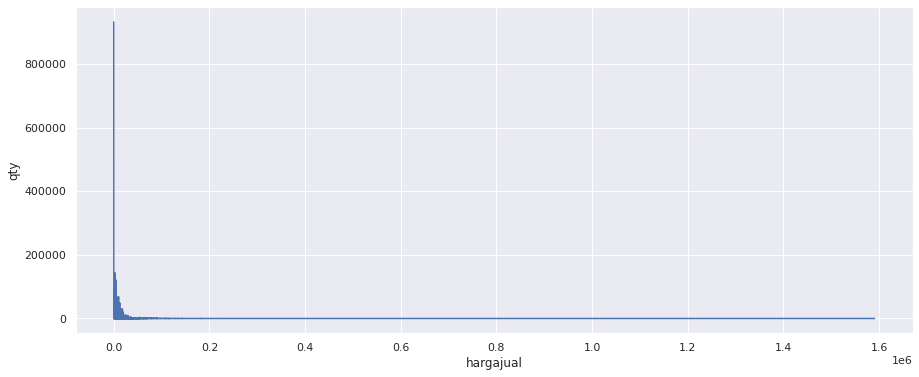

In [19]:
df_p = df.groupby(['hargajual'],as_index=False).sum()
sns.set(rc={'figure.figsize':(15,6)})
sns.lineplot(x='hargajual', y='qty', data=df_p)

In [20]:
# Handling Outliers
df = df[df['hargajual'] < 6000]

In [21]:
df = df[df['qty'] < 4000]

In [22]:
# removing the negative numbers and zero values in number of products sold.
df[df['qty']<1].count()

tgl             152
satuan          152
qty             152
hargajual       152
barcode         152
kodejenis       152
kodekategori    152
month_yr        152
dtype: int64

In [23]:
df = df[df['qty']>0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



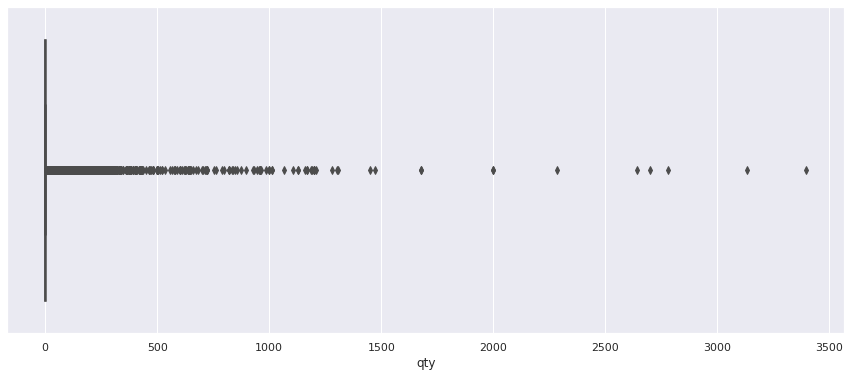

In [24]:
# reviewing the outlier of the number of products sold
ax = sns.boxplot(df['qty']) 

# DF 2016 - 2018

In [25]:
train_monthly = df[['tgl', 'month_yr', 'kodejenis', 'barcode', 'qty']].copy()
train_monthly = train_monthly.sort_values('tgl').groupby(['month_yr', 'kodejenis', 'barcode'], as_index=False)
train_monthly = train_monthly.agg({'qty':['sum']})
train_monthly.columns = ['month_yr', 'kodejenis', 'barcode', 'qty_cnt']
train_monthly = train_monthly.query('qty_cnt >= 0 and qty_cnt <= 50')

train_monthly['qty_cnt_month'] = train_monthly.sort_values('month_yr').groupby(['barcode', 'kodejenis'])['qty_cnt'].shift(-1)

display(train_monthly.head())

,month_yr,kodejenis,barcode,qty_cnt,qty_cnt_month
0,0,10101,8992931080034,1.00,29.00
2,0,10102,27548,4.00,5.00
3,0,10102,27550,3.00,5.00
4,0,10102,8993417229619,14.00,14.00
5,0,10103,4801010560500,32.00,29.00


In [27]:
monthly_series = train_monthly.pivot_table(index=['barcode', 'kodejenis'], columns='month_yr',values='qty_cnt', fill_value=0).reset_index()
monthly_series.head()

month_yr,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,00149464,JB000066,0.00,0.00,0.00,0,0.00,0,36.70,0.00,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00,0
1,00163422,20602,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,17.40,14.46,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00,0
2,00204,JB000075,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,2.00,3,5.00,7.00,11,3,0,9,10,15,8.00,5
3,00205,JB000075,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0,0.00,0.00,0,0,1,0,0,0,4.00,19
4,00223,JB000075,0.00,0.00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.00,3,3.00,0.00,0,2,0,1,0,0,3.00,5


In [28]:
first_month = 23
last_month = 35
serie_size = 12
data_series = []

for index, row in monthly_series.iterrows():
    for month1 in range((last_month - (first_month + serie_size)) + 1):
        serie = [row['barcode'], row['kodejenis']]
        for month2 in range(serie_size + 1):
            serie.append(row[month1 + first_month + month2])
        data_series.append(serie)

columns = ['barcode', 'kodejenis']
[columns.append(i) for i in range(serie_size)]
columns.append('label')

data_series = pd.DataFrame(data_series, columns=columns)
data_series.head()

,barcode,kodejenis,0,1,2,3,4,5,6,7,8,9,10,11,label
0,00149464,JB000066,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00,0
1,00163422,20602,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00,0
2,00204,JB000075,0.00,2.00,3,5.00,7.00,11,3,0,9,10,15,8.00,5
3,00205,JB000075,0.00,0.00,0,0.00,0.00,0,0,1,0,0,0,4.00,19
4,00223,JB000075,0.00,0.00,3,3.00,0.00,0,2,0,1,0,0,3.00,5


In [29]:
data_series = data_series.drop(['barcode', 'kodejenis'], axis=1)

In [30]:
labels = data_series['label']
data_series.drop('label', axis=1, inplace=True)
train, valid, Y_train, Y_valid = train_test_split(data_series, labels.values, test_size=0.10, random_state=0)

In [31]:
print("Train set", train.shape)
print("Validation set", valid.shape)
train.head()

Train set (6924, 12)
Validation set (770, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
3705,0.00,0.00,0,0.00,49.00,0,0,33,0,0,38,0.00
287,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00
2475,4.00,1.00,0,0.00,0.00,0,4,2,3,0,2,2.00
14,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00
3019,0.00,0.00,0,0.00,0.00,0,0,0,0,0,0,0.00


In [32]:
X_train = train.values.reshape((train.shape[0], train.shape[1], 1))
X_valid = valid.values.reshape((valid.shape[0], valid.shape[1], 1))

print("Train set reshaped", X_train.shape)
print("Validation set reshaped", X_valid.shape)

Train set reshaped (6924, 12, 1)
Validation set reshaped (770, 12, 1)


In [33]:
serie_size =  X_train.shape[1] # 12
n_features =  X_train.shape[2] # 1

epochs = 1000
batch = 128
lr = 0.0001

gru_model = Sequential()
gru_model.add(L.GRU(10, input_shape=(serie_size, n_features), return_sequences=True))
gru_model.add(L.GRU(6, activation='relu', return_sequences=True))
gru_model.add(L.GRU(1, activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(10, kernel_initializer='glorot_normal', activation='relu'))
gru_model.add(L.Dense(1))
gru_model.summary()

adam = optimizers.Adam(lr)
gru_model.compile(loss='mse', optimizer=adam)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 12, 10)            390       
                                                                 
 gru_1 (GRU)                 (None, 12, 6)             324       
                                                                 
 gru_2 (GRU)                 (None, 1)                 27        
                                                                 
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 882
Trainable params: 882
Non-trainable pa

In [34]:
early_stop = callbacks.EarlyStopping(patience = 10)
gru_history = gru_model.fit(X_train, Y_train, 
                              validation_data=(X_valid, Y_valid), 
                              batch_size=batch, 
                              epochs=epochs, 
                              verbose=2,
                              callbacks=[early_stop])

Epoch 1/1000
55/55 - 7s - loss: 117.9158 - val_loss: 145.5240 - 7s/epoch - 133ms/step
Epoch 2/1000
55/55 - 1s - loss: 117.8097 - val_loss: 145.3987 - 974ms/epoch - 18ms/step
Epoch 3/1000
55/55 - 1s - loss: 117.6966 - val_loss: 145.2661 - 961ms/epoch - 17ms/step
Epoch 4/1000
55/55 - 1s - loss: 117.5758 - val_loss: 145.1209 - 1s/epoch - 19ms/step
Epoch 5/1000
55/55 - 1s - loss: 117.4394 - val_loss: 144.9378 - 1s/epoch - 19ms/step
Epoch 6/1000
55/55 - 1s - loss: 117.2107 - val_loss: 144.5305 - 1s/epoch - 19ms/step
Epoch 7/1000
55/55 - 1s - loss: 116.7271 - val_loss: 143.8342 - 965ms/epoch - 18ms/step
Epoch 8/1000
55/55 - 1s - loss: 116.0484 - val_loss: 142.9129 - 940ms/epoch - 17ms/step
Epoch 9/1000
55/55 - 1s - loss: 115.1615 - val_loss: 141.6897 - 914ms/epoch - 17ms/step
Epoch 10/1000
55/55 - 1s - loss: 113.9101 - val_loss: 139.9658 - 925ms/epoch - 17ms/step
Epoch 11/1000
55/55 - 1s - loss: 112.2295 - val_loss: 137.6490 - 941ms/epoch - 17ms/step
Epoch 12/1000
55/55 - 1s - loss: 109.9629

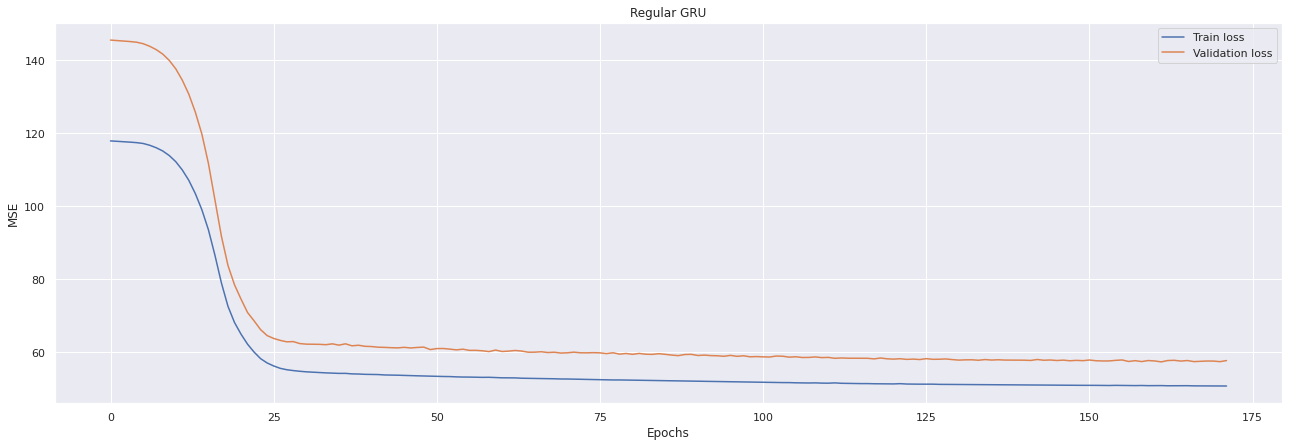

In [35]:
fig, ax1 = plt.subplots(1, sharey=True,figsize=(22,7))

ax1.plot(gru_history.history['loss'], label='Train loss')
ax1.plot(gru_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Regular GRU')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

plt.show()

In [36]:
lstm_train_pred = gru_model.predict(X_train)
lstm_val_pred = gru_model.predict(X_valid)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

Train rmse: 7.12591543994428
Validation rmse: 7.600603437048866


# Test

In [ ]:
test = df2019.drop(['tgl', 'satuan', 'qty', 'kodejenis', 'kodekategori'], axis=1)

In [ ]:
test.head()

,barcode
0,8992752011408
1,8992696404441
2,089686043686
3,8992775204009
4,089686043204


In [ ]:
clean_test = test.drop_duplicates(subset=['barcode'])

In [ ]:
latest_records = monthly_series.drop_duplicates(subset=['barcode'])
X_test = pd.merge(clean_test, latest_records, on=['barcode'], how='left', suffixes=['', '_'])
X_test.fillna(0, inplace=True)
X_test.drop(['barcode', 'kodejenis'], axis=1, inplace=True)

In [ ]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.00,0.00,0.00,33.00,26.00,33.00,33.00,36.00,26.00,30.00,0.00,26.00,18.00,49.00,0.00,34.00,33.00,31.00,15.00,41.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_test = X_test[[(i + (36 - serie_size)) for i in range(serie_size)]]
X_test.head()

,24,25,26,27,28,29,30,31,32,33,34,35
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,26.00,30.00,0.00,26.00,18.00,49.00,0.00,34.00,33.00,31.00,15.00,41.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test_reshaped.shape)

(18769, 12, 1)


In [ ]:
lstm_test_pred = gru_model.predict(X_test_reshaped)

In [ ]:
lstm_prediction = pd.DataFrame(clean_test['barcode'], columns=['barcode'])
lstm_prediction['item_cnt_month'] = lstm_test_pred.clip(0., 50.)
lstm_prediction.head()
# lstm_prediction.to_csv('gru_submission.csv', index=False)

,barcode,item_cnt_month
0,8992752011408,0.15
1,8992696404441,0.15
2,089686043686,0.15
3,8992775204009,26.71
4,089686043204,0.15


In [ ]:
lstm_prediction.head(100)

,barcode,item_cnt_month
0,8992752011408,0.15
1,8992696404441,0.15
2,089686043686,0.15
3,8992775204009,26.71
4,089686043204,0.15
5,8992770094117,0.15
6,8993560024901,26.87
7,8999999059781,0.15
8,8992802618731,13.73
9,8993189270765,19.98


In [ ]:
# lstm_train_pred = gru_model.predict(X_train)
# lstm_val_pred = gru_model.predict(X_valid)
# print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_val_pred)))

# lstm_test_pred = gru_model.predict(X_valid)
# print('Validation rmse:', np.sqrt(mean_squared_error(Y_valid, lstm_test_pred)))